In [1]:
# 환경셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns 

In [2]:
# 데이터 불러오기
data = pd.read_csv('./archive/example.csv')
data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26547,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
26548,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
26549,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
26550,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


In [3]:
data.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [4]:
# 문제와 답 (열 분리)
X = data[['FG_PCT_home','FG_PCT_away']]
y = data['HOME_TEAM_WINS']

In [5]:
# 훈련셋과 테스트셋 분리 (행 분리)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [6]:
# 모델 객체 생성
# 단일 트리모델 몇개까지 겹쳐서 활용할 것인지 > 하이퍼 파라미터
rf_model = RandomForestClassifier(n_estimators=100)

In [7]:
# 모델 학습
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
# 정확도 평가
accuracy = rf_model.score(X_test,y_test)

In [9]:
# 교차 검증 수행
rf_result = cross_val_score(rf_model, X_train, y_train, cv=5)

In [10]:
# 결과 출력
print(f"교차 검증 점수: {rf_result}")
print(f"평균 교차 검증 점수: {rf_result.mean()}")
print(f"테스트 세트 정확도: {accuracy}")

교차 검증 점수: [0.76148632 0.76299272 0.75671604 0.7494351  0.74585635]
평균 교차 검증 점수: 0.755297306369751
테스트 세트 정확도: 0.7561012353118409


#### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

In [12]:
params = {
    'max_depth': [8, 16, 24],
    'min_samples_leaf': [1, 6, 12],
    'min_samples_split': [2, 8, 16],
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=4, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적의 하이퍼파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적의 하이퍼파라미터:
 {'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.7993


In [13]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=8, 
                                min_samples_leaf=6, min_samples_split=2, random_state=4)
rf_clf1.fit(X_train,y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.7939138294667069


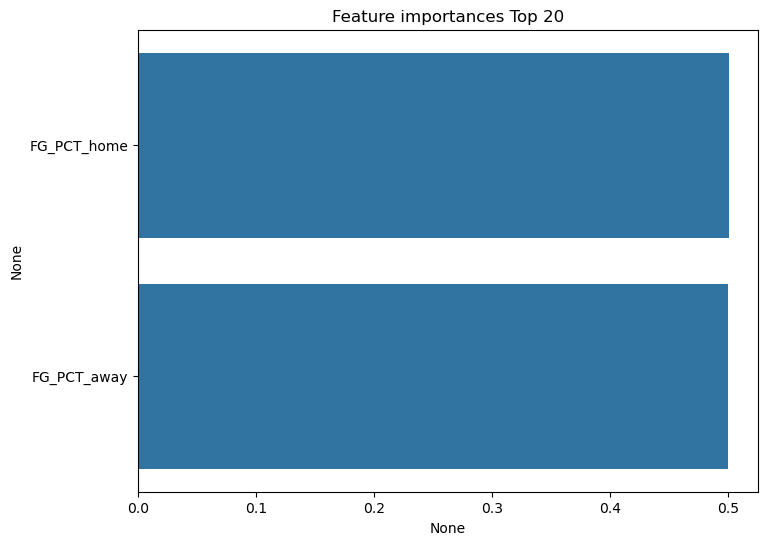

In [14]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()